In [44]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
## load the dataset
aircraft = pd.read_csv('M1_final.csv')
aircraft.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [4]:
# info about the dataset
aircraft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

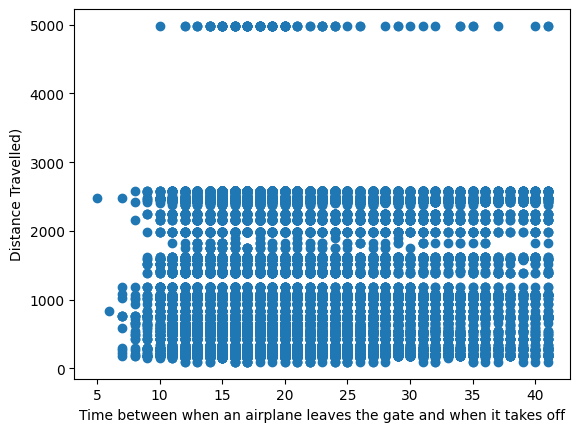

In [6]:
## Explore the data
## Create a scatterplot for distance vs taxi_out
plt.scatter(aircraft['TAXI_OUT'], aircraft['DISTANCE'])

## label the axis
plt.xlabel('Time between when an airplane leaves the gate and when it takes off')
plt.ylabel('Distance Travelled)')

plt.show()

In [7]:
# correlation matric
corr_matrix = aircraft.corr()
corr_matrix

C:\Users\abdik\AppData\Local\Temp\ipykernel_2344\3739573759.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = aircraft.corr()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


<AxesSubplot: >

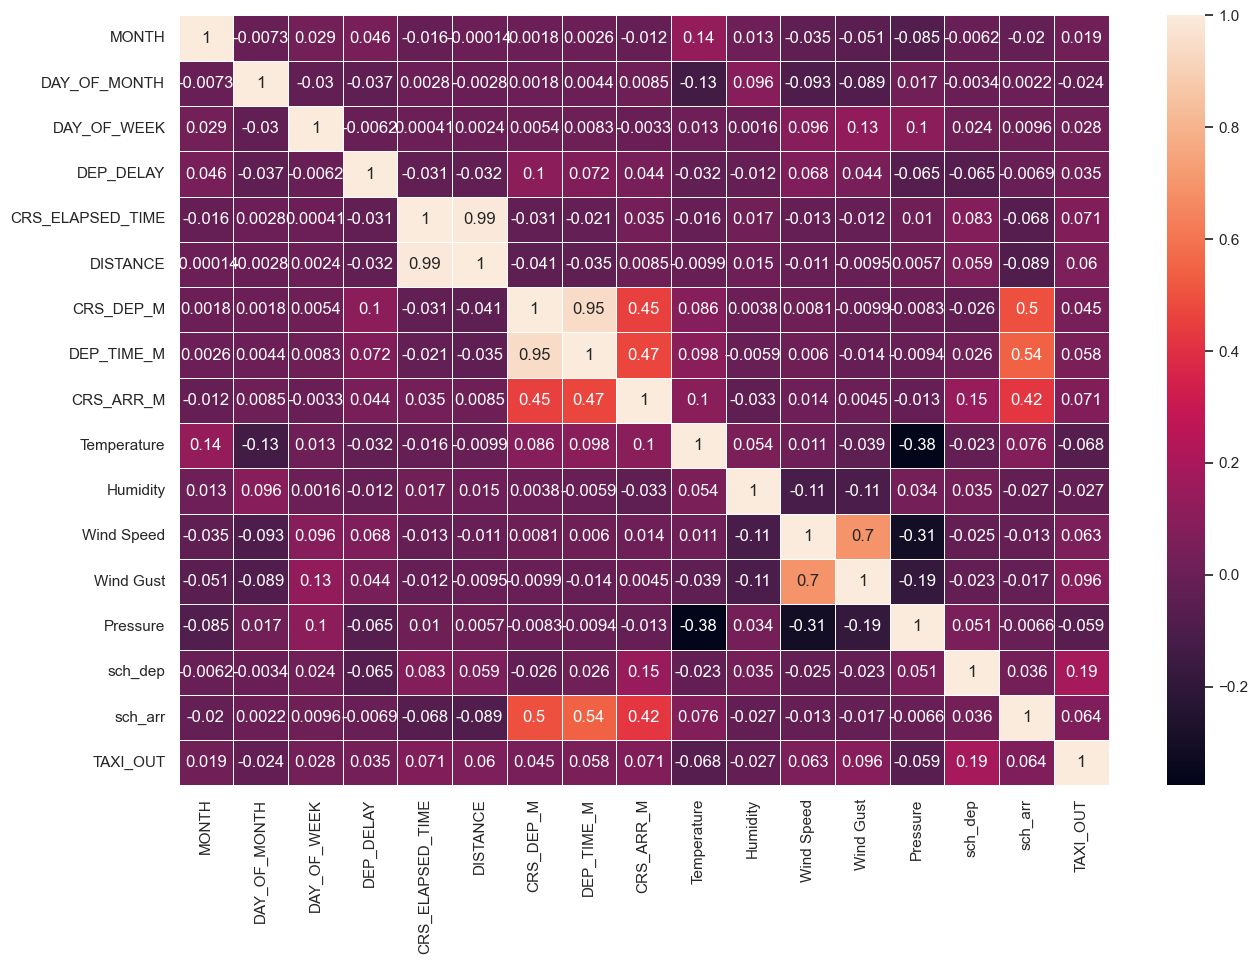

In [14]:
#heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, annot=True, linewidths=0.5,)

In [34]:
# specifying the x and y variables
x = aircraft.iloc[:, [0, 1, 2, 8, 16]]
y = aircraft.iloc[:, 22]

In [35]:
# train, test and split my data
# Used 30% for testing and 70% for training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

In [36]:
X_train

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DISTANCE,Wind Speed
9767,11,30,6,264,7
19142,1,1,3,184,18
6381,11,20,3,2422,20
3104,11,10,7,944,10
24591,1,19,7,2153,13
...,...,...,...,...,...
20414,1,5,7,740,15
27516,1,28,2,541,21
9526,11,30,6,427,15
9771,12,1,7,636,6


In [37]:
y_train

9767     20
19142    17
6381     17
3104     16
24591    26
         ..
20414    29
27516    16
9526     20
9771     16
10967    26
Name: TAXI_OUT, Length: 20174, dtype: int64

In [ ]:
## standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
## linear regression
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [42]:
pred_lin = lin_reg.predict(X_test)

In [43]:
# create a dataframe for predictions
pd.DataFrame({'Actual': y_test, 'Predicted': pred_lin})

,Actual,Predicted
9362,23,21.376077
23840,14,22.332834
24617,22,21.769079
24899,19,21.574468
2007,20,20.874228
...,...,...
25794,24,20.150595
9596,21,20.553501
23574,26,20.409745
3772,19,22.146665


In [45]:
## MAE Mean absolute error
## MSE Mean square error
## RMSE root mean square error
## R2 metrics to goodness of fit between actual and predicted values

print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))

MAE: 5.511016177663451
MSE: 47.193861436583646
RMSE: 6.869778849175834
R2: 0.007574498894965309
